### Bonificação para Entregadores ###
Numa ação de marketing, para atrair mais entregadores, vamos dar uma bonificação para os 20 entregadores de cada modal que possuírem  maior distância percorrida ao todo. A bonificação vai variar de acordo com o tipo de profissional que ele é e o modelo que ele usa para se locomover (moto, bike, etc). Levante essas informações.

Tabelas consumidas:
* deliveries
* drives

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
def first_view(data):
    """
    This function allows to check the variables name, and types.
    Additionaly it allows to check the percentage of null values for each variable

    input: dataframe to be queried
    """
    dtype=data.info()
    null_percentage=(data.isnull().sum() / data.shape[0] * 100)
    null_df = pd.DataFrame({'variable': null_percentage.index, 
                        'null_percentage': null_percentage.values})
    null_df.columns=[['variables', 'null_percentage']]
    return print(dtype, 
                 null_df)

In [3]:
delivery_data=pd.read_csv(r'datasets/deliveries.csv')

In [4]:
first_view(delivery_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378843 entries, 0 to 378842
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   delivery_id               378843 non-null  int64  
 1   delivery_order_id         378843 non-null  int64  
 2   driver_id                 362957 non-null  float64
 3   delivery_distance_meters  378770 non-null  float64
 4   delivery_status           378843 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 14.5+ MB
None                   variables null_percentage
0               delivery_id        0.000000
1         delivery_order_id        0.000000
2                 driver_id        4.193294
3  delivery_distance_meters        0.019269
4           delivery_status        0.000000


In [5]:
delivery_data.head()

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2174658,68413340,8378.0,5199.0,DELIVERED
1,2174660,68414309,2473.0,410.0,DELIVERED
2,2174661,68416230,7615.0,3784.0,DELIVERED
3,2174663,68412721,8378.0,5714.0,DELIVERED
4,2174675,68414018,10463.0,3746.0,DELIVERED


In [6]:
#alterando o tipo das variáveis identificadoras para string
delivery_data.delivery_id=delivery_data.delivery_id.astype('string')
delivery_data.delivery_order_id=delivery_data.delivery_order_id.astype('string')
delivery_data.driver_id=delivery_data.driver_id.astype('string').str[:-2]

In [7]:
#observando duplicidade
delivery_data.duplicated().value_counts()

False    378843
Name: count, dtype: int64

In [8]:
#observando duplicidade
delivery_data.delivery_id.duplicated().value_counts()

delivery_id
False    378843
Name: count, dtype: int64

In [9]:
#observando duplicidade
delivery_data.delivery_order_id.duplicated().value_counts(normalize=True)

delivery_order_id
False    0.946709
True     0.053291
Name: proportion, dtype: float64

In [10]:
delivery_order_filter=delivery_data.loc[delivery_data.delivery_order_id.duplicated(), 'delivery_order_id']
delivery_data[delivery_data.delivery_order_id.isin(delivery_order_filter)].sort_values(by='delivery_order_id')

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
11,2174705,68416059,9996,1450.0,DELIVERED
13,2174708,68416059,9996,1450.0,DELIVERED
40,2174790,68422281,25651,3667.0,DELIVERED
140,2175030,68422281,9996,3667.0,DELIVERED
192,2175149,68424216,17322,1452.0,DELIVERED
...,...,...,...,...,...
378567,3091917,93139644,26223,1068.0,DELIVERED
378751,3093159,93139740,44544,3009.0,DELIVERED
378678,3092299,93139740,17265,3009.0,DELIVERED
378742,3092919,93139776,1855,2557.0,DELIVERED


Não conseguimos identificar o porque da duplicidade, apenas observando os dados. Como o delivery_id é gerado na tabela order, vamos observar se encontramos duplicidade de ids naquela tabela.

### Checando tabela order_data ###

In [11]:
order_data=pd.read_csv(r'datasets/orders.csv')

In [12]:
first_view(order_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368999 entries, 0 to 368998
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           368999 non-null  int64  
 1   store_id                           368999 non-null  int64  
 2   channel_id                         368999 non-null  int64  
 3   payment_order_id                   368999 non-null  int64  
 4   delivery_order_id                  368999 non-null  int64  
 5   order_status                       368999 non-null  object 
 6   order_amount                       368999 non-null  float64
 7   order_delivery_fee                 368999 non-null  float64
 8   order_delivery_cost                361794 non-null  float64
 9   order_created_hour                 368999 non-null  int64  
 10  order_created_minute               368999 non-null  int64  
 11  order_created_day                  3689

In [13]:
#transformando id in string
order_data.delivery_order_id=order_data.delivery_order_id.astype('string')

In [14]:
order_data.loc[order_data.delivery_order_id.isin(delivery_order_filter)].sort_values(by='delivery_order_id')

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
31,68416059,631,5,68416059,68416059,FINISHED,163.3,11.9,3.72,14,...,1/1/2021 3:13:46 PM,NaN,1/1/2021 3:32:28 PM,5.75,1.02,28.77,5.78,6.80,18.72,54.28
75,68422281,632,5,68422281,68422281,FINISHED,129.7,11.9,6.00,15,...,1/1/2021 4:28:45 PM,NaN,1/1/2021 5:20:43 PM,1.37,45.23,20.62,1.37,46.62,51.97,119.20
86,68424216,3091,5,68424216,68424216,FINISHED,45.7,0.0,3.49,15,...,1/1/2021 4:45:16 PM,NaN,1/1/2021 5:29:52 PM,0.62,40.02,37.00,0.65,40.65,44.60,122.25
89,68424547,495,5,68424547,68424547,FINISHED,184.6,11.9,3.84,15,...,1/1/2021 4:13:52 PM,NaN,1/1/2021 4:30:25 PM,2.43,23.30,18.98,2.53,25.83,16.55,61.37
93,68424858,631,5,68424858,68424858,FINISHED,160.7,11.9,6.12,15,...,1/1/2021 4:19:39 PM,NaN,1/1/2021 4:36:48 PM,2.70,9.10,36.63,2.72,11.82,17.15,65.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368859,93139280,1037,5,93139280,93139280,FINISHED,145.8,11.9,30.21,23,...,5/1/2021 12:18:17 AM,NaN,5/1/2021 12:38:03 AM,0.23,6.12,23.53,4.57,10.70,19.75,53.98
368923,93139564,1009,10,93139564,93139564,FINISHED,76.0,11.9,NaN,23,...,5/1/2021 12:34:09 AM,NaN,5/1/2021 12:34:18 AM,1.17,22.37,15.10,6.78,29.15,0.15,44.40
368945,93139644,1009,10,93139644,93139644,FINISHED,101.0,11.9,NaN,23,...,5/1/2021 12:14:38 AM,NaN,5/1/2021 12:39:22 AM,0.13,2.90,15.02,3.53,6.43,24.73,46.18
368974,93139740,1037,5,93139740,93139740,FINISHED,151.8,11.9,16.06,23,...,5/1/2021 12:31:53 AM,NaN,5/1/2021 12:53:51 AM,2.17,5.95,24.45,4.02,9.97,21.97,56.38


Não há duplicidade na tabela order_data, logo não conseguimos identificar o porquê da duplicidade na tabela deliveries. 

Como não sabemos qual é a delivery_order, manteremos a duplicidade dos dados - mas alertaremos o time de engenharia para checar o pipeline e possivelmene corrigir este problema.

Como a tabela deliveries não possue o tipo de veículo (modal), faremos um *join* entre esta tabela e a tabela drivers. Após isto, realizaremos a análise solicitada.

In [15]:
drive_data=pd.read_csv(r'datasets/drivers.csv')

In [16]:
first_view(drive_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4824 entries, 0 to 4823
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   driver_id     4824 non-null   int64 
 1   driver_modal  4824 non-null   object
 2   driver_type   4824 non-null   object
dtypes: int64(1), object(2)
memory usage: 113.2+ KB
None       variables null_percentage
0     driver_id             0.0
1  driver_modal             0.0
2   driver_type             0.0


In [17]:
drive_data.head()

,driver_id,driver_modal,driver_type
0,133,MOTOBOY,LOGISTIC OPERATOR
1,138,MOTOBOY,FREELANCE
2,140,MOTOBOY,FREELANCE
3,143,BIKER,FREELANCE
4,148,MOTOBOY,FREELANCE


In [18]:
drive_data['driver_id']=drive_data['driver_id'].astype('str')

In [19]:
pd.Series(drive_data['driver_id'].unique())

0         133
1         138
2         140
3         143
4         148
        ...  
4819    66260
4820    66271
4821    66457
4822    66459
4823    66494
Length: 4824, dtype: object

In [20]:
drivers_list=pd.Series(drive_data['driver_id'].unique())
drivers_deliveried=pd.Series(delivery_data['driver_id'].unique())
print(len(drivers_list), len(drivers_deliveried))

4824 4584


In [21]:
#checando qto temos de motoristas inscritos na lista de delivery
drivers_list.isin(drivers_deliveried).value_counts()

True     4583
False     241
Name: count, dtype: int64

In [22]:
#total de linhas do dataset delivery_data
delivery_data.shape[0]

378843

In [23]:
#join datases
data=delivery_data.merge(drive_data, on='driver_id', how='left')

In [24]:
first_view(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378843 entries, 0 to 378842
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   delivery_id               378843 non-null  string 
 1   delivery_order_id         378843 non-null  string 
 2   driver_id                 362957 non-null  object 
 3   delivery_distance_meters  378770 non-null  float64
 4   delivery_status           378843 non-null  object 
 5   driver_modal              362957 non-null  object 
 6   driver_type               362957 non-null  object 
dtypes: float64(1), object(4), string(2)
memory usage: 20.2+ MB
None                   variables null_percentage
0               delivery_id        0.000000
1         delivery_order_id        0.000000
2                 driver_id        4.193294
3  delivery_distance_meters        0.019269
4           delivery_status        0.000000
5              driver_modal        4.193294
6        

Temos 4% de entregas sem informação sobre driver_id, como a missão é ranquear e bonificar os entregadores que percorreram mais distância no período, iremos deletar as entregas que estão sem informação de id dos motoristas.

In [25]:
data=data.loc[~data['driver_id'].isnull()]

In [26]:
data['modal_type']=data.driver_modal+' '+data.driver_type

In [27]:
total_km_data=data.groupby(['modal_type',
      'driver_id'])['delivery_distance_meters'].sum().reset_index().sort_values(by=[
        'modal_type'], ascending=False)

In [28]:
total_km_data['delivery_distance_km']=np.round(total_km_data['delivery_distance_meters']/1000,2)

In [30]:
modal_type_list=list(total_km_data.modal_type.unique())
ranking_km_data=pd.DataFrame()

for mt in modal_type_list:
    df= total_km_data.loc[total_km_data['modal_type']==mt].sort_values(by='delivery_distance_km', 
                                                                                    ascending=False)[0:20]
    ranking_km_data=pd.concat([ranking_km_data,df])

In [31]:
#checando resultado
ranking_km_data['modal_type'].value_counts()

modal_type
MOTOBOY LOGISTIC OPERATOR    20
MOTOBOY FREELANCE            20
BIKER FREELANCE              20
BIKER LOGISTIC OPERATOR       1
Name: count, dtype: int64

In [32]:
modal_type_list=list(total_km_data.modal_type.unique())
ranking_km_data=pd.DataFrame()

for mt in modal_type_list:
        df=total_km_data.loc[total_km_data['modal_type']==mt][0:20]
        ranking_km_data=pd.concat([ranking_km_data,df])

In [33]:
ranking_km_data

,modal_type,driver_id,delivery_distance_meters,delivery_distance_km
4582,MOTOBOY LOGISTIC OPERATOR,9855,25545.0,25.54
3988,MOTOBOY LOGISTIC OPERATOR,33850,29535.0,29.54
3999,MOTOBOY LOGISTIC OPERATOR,34554,10145.0,10.14
3998,MOTOBOY LOGISTIC OPERATOR,34390,74028.0,74.03
3997,MOTOBOY LOGISTIC OPERATOR,34241,617376.0,617.38
...,...,...,...,...
536,BIKER FREELANCE,30032,33048.0,33.05
542,BIKER FREELANCE,30182,121717.0,121.72
537,BIKER FREELANCE,30053,8209.0,8.21
541,BIKER FREELANCE,30170,983.0,0.98


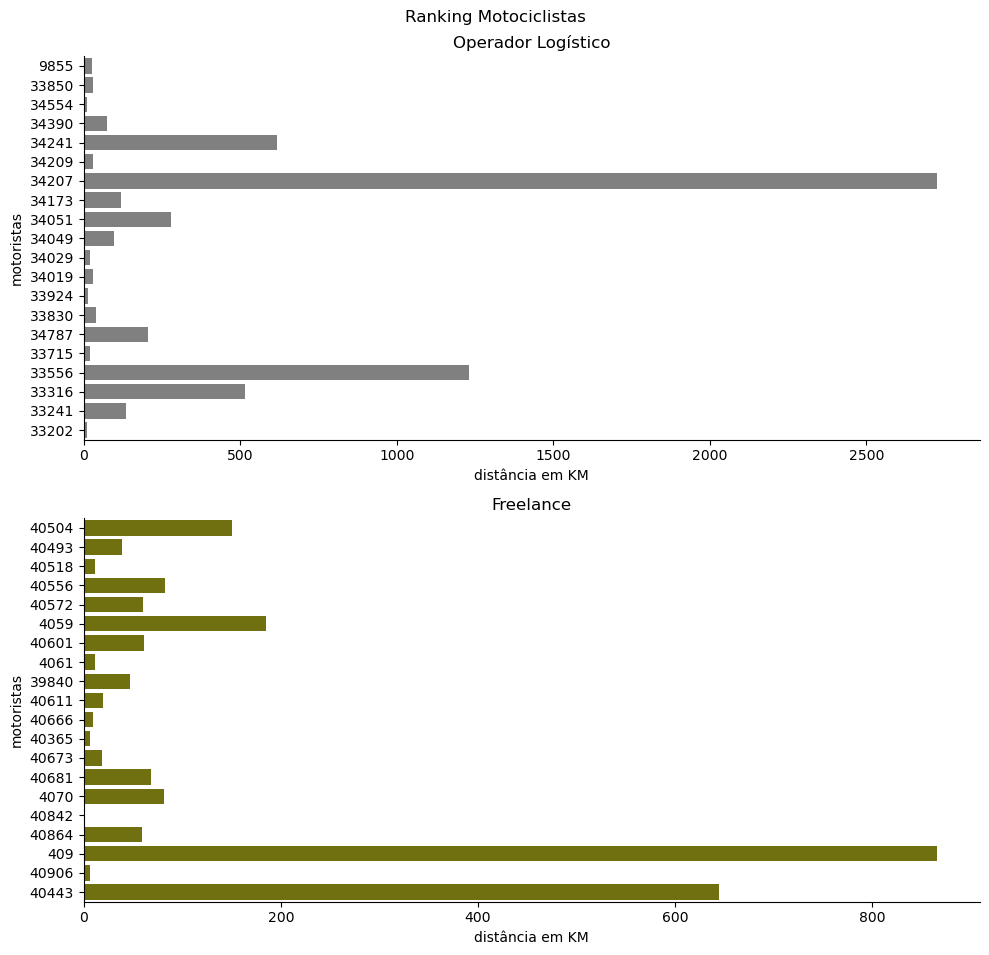

<Figure size 640x700 with 0 Axes>

In [34]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 10)) 
fig.suptitle("Ranking Motociclistas") 
ax1=sns.barplot(data=ranking_km_data.loc[ranking_km_data['modal_type']==modal_type_list[0]][0:20],
                x='delivery_distance_km',
                y='driver_id',ax=axes[0],
               color='gray')
ax1.set_ylabel('motoristas')
ax1.set_xlabel("distância em KM")
axes[0].set_title("Operador Logístico") 

ax2=sns.barplot(data=ranking_km_data.loc[ranking_km_data['modal_type']==modal_type_list[1]][0:20], 
                x='delivery_distance_km',
                y='driver_id',
                ax=axes[1],
               color='olive')
ax2.set_ylabel('motoristas')
ax2.set_xlabel("distância em KM")
axes[1].set_title("Freelance") 
plt.tight_layout(rect=[0, 0.03, 1, 1])
sns.despine()
plt.figure(figsize=[6.4,7]);

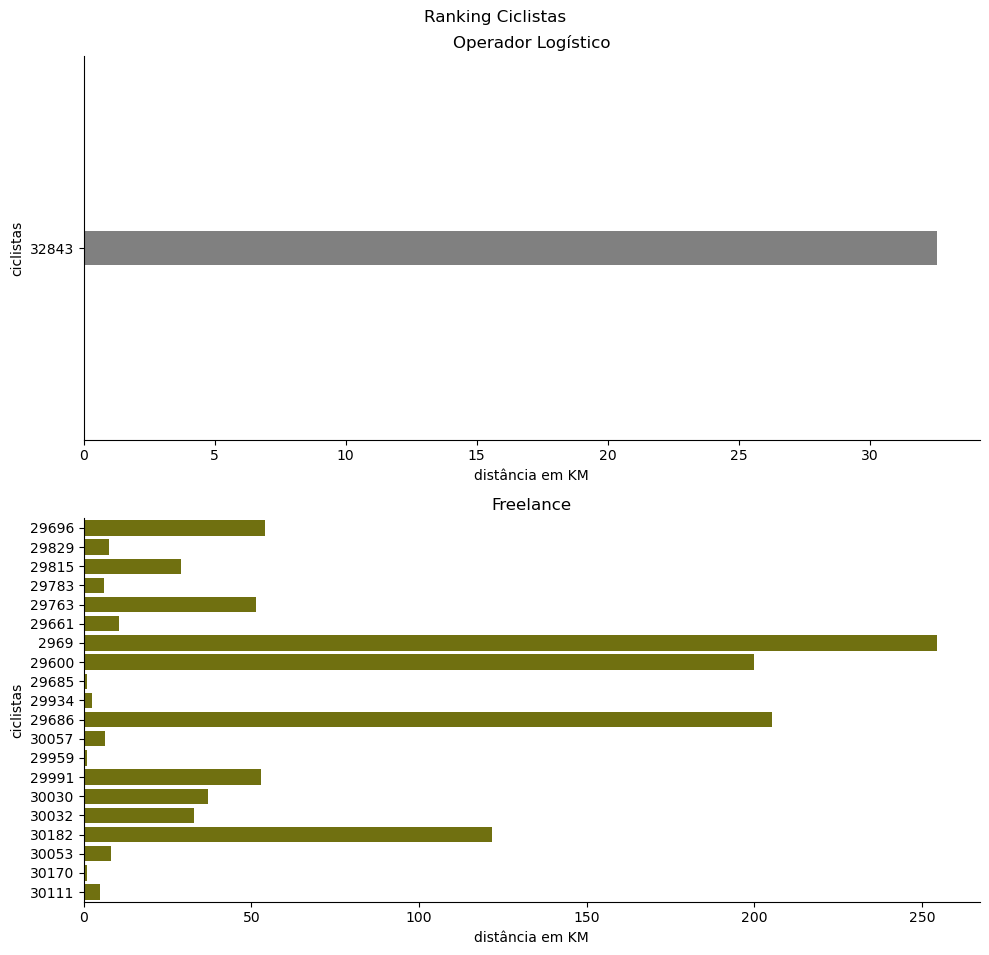

<Figure size 640x700 with 0 Axes>

In [35]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 10)) 
fig.suptitle("Ranking Ciclistas") 
ax1=sns.barplot(data=ranking_km_data.loc[ranking_km_data['modal_type']==modal_type_list[2]][0:20],
                x='delivery_distance_km',
                y='driver_id',ax=axes[0],
               color='gray',
               width=0.09)
ax1.set_ylabel('ciclistas')
ax1.set_xlabel("distância em KM")
axes[0].set_title("Operador Logístico") 

ax2=sns.barplot(data=ranking_km_data.loc[ranking_km_data['modal_type']==modal_type_list[3]][0:20], 
                x='delivery_distance_km',
                y='driver_id',
                ax=axes[1],
               color='olive')
ax2.set_ylabel('ciclistas')
ax2.set_xlabel("distância em KM")
axes[1].set_title("Freelance") 
plt.tight_layout(rect=[0, 0.03, 1, 1])
sns.despine()
plt.figure(figsize=[6.4,7]);